In [268]:
import pandas as pd

features_df = pd.read_pickle("../data/processed/features.pkl")

In [269]:
features_df

,start_time,end_time,month_sin,month_cos,day_of_week_sin,day_of_week_cos,minute_of_day_sin,minute_of_day_cos,wind_dir_sin,wind_dir_cos,...,avg_dep_delay_slot_minutes,avg_dep_delay_prev_slot_minutes,avg_dep_delay_past_6h_minutes,scheduled_B,scheduled_C,scheduled_D,scheduled_E,scheduled_F,scheduled_rwy_concept,arr_dep_ratio
0,2023-01-01 00:00:00+00:00,2023-01-01 00:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.000000,1.000000,0.173648,-0.984808,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
1,2023-01-01 00:30:00+00:00,2023-01-01 01:00:00+00:00,0.000000,1.0,-0.781831,0.623490,0.130526,0.991445,0.173648,-0.984808,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
2,2023-01-01 01:00:00+00:00,2023-01-01 01:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.258819,0.965926,-0.173648,-0.984808,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
3,2023-01-01 01:30:00+00:00,2023-01-01 02:00:00+00:00,0.000000,1.0,-0.781831,0.623490,0.382683,0.923880,-0.866025,-0.500000,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
4,2023-01-01 02:00:00+00:00,2023-01-01 02:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.500000,0.866025,-0.342020,-0.939693,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2025-09-26 21:30:00+00:00,2025-09-26 22:00:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.608761,0.793353,NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47996,2025-09-26 22:00:00+00:00,2025-09-26 22:30:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.500000,0.866025,NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47997,2025-09-26 22:30:00+00:00,2025-09-26 23:00:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.382683,0.923880,NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47998,2025-09-26 23:00:00+00:00,2025-09-26 23:30:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.258819,0.965926,-0.500000,-0.866025,...,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0


In [270]:
X = features_df[['month_sin',
                 'month_cos',
                 'day_of_week_sin',
                 'day_of_week_cos',
                 'minute_of_day_sin',
                 'minute_of_day_cos',
                 'wind_dir_sin',
                'wind_dir_cos',
                'wind_speed_kt',
                'is_wind_variable',
                'vis_ge_10km',
                'vis_category',
                'temperature_c',
                'spread_c',
                'qnh_hpa',
                'is_holiday',
                'scheduled_departures',
                'scheduled_arrivals',
                'avg_dep_delay_prev_slot_minutes',
                'avg_dep_delay_past_6h_minutes',
                'scheduled_B',
                'scheduled_C',
                'scheduled_D',
                'scheduled_E',
                'scheduled_F',
                'scheduled_rwy_concept',
                'arr_dep_ratio'
        ]]

In [271]:
y = features_df[['avg_dep_delay_slot_minutes']]

In [272]:
import xgboost 

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42) 

In [275]:
X_test

,month_sin,month_cos,day_of_week_sin,day_of_week_cos,minute_of_day_sin,minute_of_day_cos,wind_dir_sin,wind_dir_cos,wind_speed_kt,is_wind_variable,...,scheduled_arrivals,avg_dep_delay_prev_slot_minutes,avg_dep_delay_past_6h_minutes,scheduled_B,scheduled_C,scheduled_D,scheduled_E,scheduled_F,scheduled_rwy_concept,arr_dep_ratio
593,0.000000e+00,1.000000e+00,-0.433884,-0.900969,0.793353,-6.087614e-01,-8.660254e-01,-0.500000,10.0,False,...,7,11.707143,5.636318,0,4,0,1,0,NorthWest,1.400000
6329,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,-0.793353,6.087614e-01,6.427876e-01,0.766044,6.0,False,...,14,-0.250000,19.798576,0,3,0,4,0,NorthWest,2.000000
32971,-8.660254e-01,5.000000e-01,-0.781831,0.623490,-0.608761,7.933533e-01,-9.848078e-01,0.173648,7.0,False,...,15,0.000000,15.893836,0,1,0,5,0,NaN,2.500000
3922,8.660254e-01,5.000000e-01,0.433884,-0.900969,-0.965926,-2.588190e-01,-8.660254e-01,-0.500000,8.0,False,...,5,19.771667,12.661715,0,6,0,1,0,Standard,0.714286
6484,8.660254e-01,-5.000000e-01,0.781831,0.623490,0.500000,8.660254e-01,-1.736482e-01,0.984808,3.0,False,...,0,0.000000,3.032407,0,0,0,0,0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45249,1.224647e-16,-1.000000e+00,0.433884,-0.900969,-0.923880,-3.826834e-01,-9.848078e-01,0.173648,5.0,False,...,8,33.166667,24.956536,0,5,0,1,0,Standard,1.333333
38973,8.660254e-01,5.000000e-01,-0.974928,-0.222521,-0.382683,9.238795e-01,-9.848078e-01,-0.173648,3.0,False,...,0,0.000000,5.526009,0,0,0,0,0,NaN,0.000000
5199,1.000000e+00,6.123234e-17,0.974928,-0.222521,0.923880,-3.826834e-01,3.420201e-01,0.939693,8.0,False,...,8,5.650000,3.873088,0,8,0,2,0,Standard,0.800000
29630,-8.660254e-01,-5.000000e-01,0.000000,1.000000,0.965926,-2.588190e-01,1.224647e-16,-1.000000,4.0,False,...,3,12.375000,7.053973,0,9,0,1,0,Standard,0.300000


In [276]:
from xgboost import XGBRegressor

In [277]:
model = XGBRegressor(
    objective = 'reg:squarederror',
    enable_categorical = True,
    random_state = 42,
    early_stopping_rounds = 50,
    n_estimators = 100000,
    learning_rate = 0.05,
)

In [278]:
model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose=0)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,True
,eval_metric,None


In [279]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [280]:
y_pred_val = model.predict(X_val)

In [281]:
y_pred_val

array([11.28065   ,  0.09611893, 23.448215  , ..., 11.356875  ,
       31.320522  , 20.459797  ], shape=(9600,), dtype=float32)

In [282]:
mae_y_val = mean_absolute_error(y_val,y_pred_val)

In [283]:
mae_y_val

5.1930389404296875

In [284]:
rmse_y_val = root_mean_squared_error(y_val,y_pred_val)

In [285]:
rmse_y_val

9.408954620361328

In [286]:
r2_y_val = r2_score(y_val,y_pred_val)


In [287]:
r2_y_val

0.6081852912902832

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

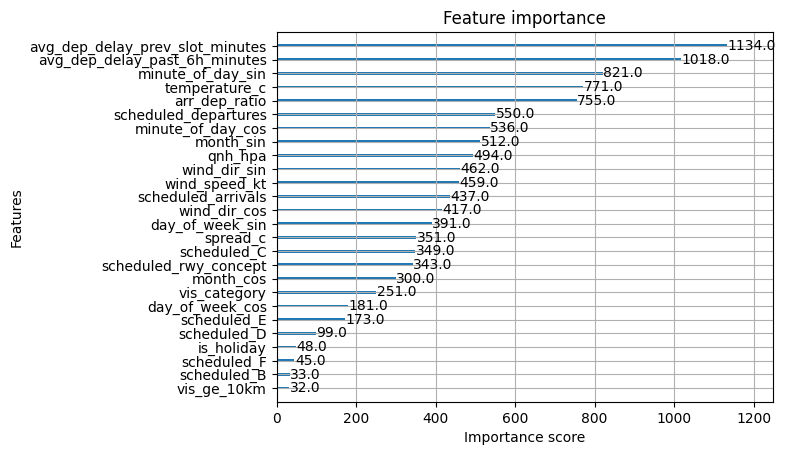

In [288]:
import xgboost as xgb
xgb.plot_importance(model, max_num_features=36)